<a href="https://colab.research.google.com/github/charlie-aashutosh/charlie/blob/master/sale_price_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

from google.colab import files
files=files.upload()

Saving retail sale.csv to retail sale.csv


In [0]:
df=pd.read_csv("retail sale.csv")

In [4]:
df.head(10)

,DATE,RSAFSNA
0,1/1/1992,146376
1,2/1/1992,147079
2,3/1/1992,159336
3,4/1/1992,163669
4,5/1/1992,170068
5,6/1/1992,168663
6,7/1/1992,169890
7,8/1/1992,170364
8,9/1/1992,164617
9,10/1/1992,173655


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     309 non-null    object
 1   RSAFSNA  309 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.0+ KB


In [6]:

df.describe()

,RSAFSNA
count,309.000000
mean,317448.550162
std,91544.113305
min,146376.000000
25%,240991.000000
50%,319958.000000
75%,385590.000000
max,542055.000000


In [0]:

df.set_index('DATE', inplace=True)

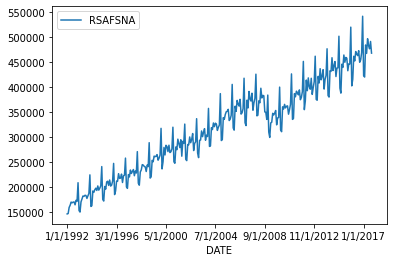

In [8]:
#visualizations

df.plot()

In [0]:
#testing for stationarity

from statsmodels.tsa.stattools import adfuller

In [0]:
test_result=adfuller(df['RSAFSNA'])

In [0]:
#hypothesis testing
#H0 is non-stationary and H1 is stationary

def adfuller_test(RSAFSNA):
  result=adfuller(RSAFSNA)
  labels=['ADF Test Statistics', 'p_value', '#Lags Used', 'Number of Observations Used']
  for value , label in zip(result, labels):
    print(label+':'+str(value))
  if result[1] <= 0.05:
    print("strong evidence against null hypothesis H0") 
  else:
    print("weak evidence against null hypothesis H1")


In [12]:

adfuller_test(df['RSAFSNA'])

ADF Test Statistics:-0.24789726691974595
p_value:0.9325663351169045
#Lags Used:15
Number of Observations Used:293
weak evidence against null hypothesis H1


In [0]:
#applying Differencing
df['RSAFSNA First Difference']=df['RSAFSNA']-df['RSAFSNA'].shift(1)

In [14]:
df['RSAFSNA'].shift(1)

DATE
1/1/1992         NaN
2/1/1992    146376.0
3/1/1992    147079.0
4/1/1992    159336.0
5/1/1992    163669.0
              ...   
5/1/2017    467675.0
6/1/2017    497070.0
7/1/2017    483261.0
8/1/2017    476896.0
9/1/2017    491572.0
Name: RSAFSNA, Length: 309, dtype: float64

In [0]:
df['Seasonal First Difference']=df['RSAFSNA']-df['RSAFSNA'].shift(2)

In [16]:
df.head(15)

,RSAFSNA,RSAFSNA First Difference,Seasonal First Difference
DATE,,,
1/1/1992,146376,NaN,NaN
2/1/1992,147079,703.0,NaN
3/1/1992,159336,12257.0,12960.0
4/1/1992,163669,4333.0,16590.0
5/1/1992,170068,6399.0,10732.0
6/1/1992,168663,-1405.0,4994.0
7/1/1992,169890,1227.0,-178.0
8/1/1992,170364,474.0,1701.0
9/1/1992,164617,-5747.0,-5273.0


In [17]:

adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistics:-4.009842132160475
p_value:0.001359842797474155
#Lags Used:16
Number of Observations Used:290
strong evidence against null hypothesis H0


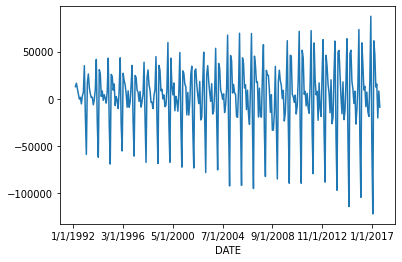

In [18]:
df['Seasonal First Difference'].plot()

In [0]:
#implementing the ARIMA model

In [0]:
from pandas.plotting import autocorrelation_plot

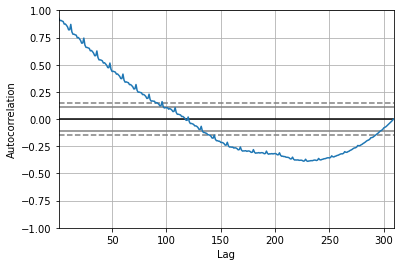

In [21]:

autocorrelation_plot(df['RSAFSNA'])
plt.show()

In [0]:
import statsmodels.api as sm

In [0]:
from statsmodels.graphics import tsaplots

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

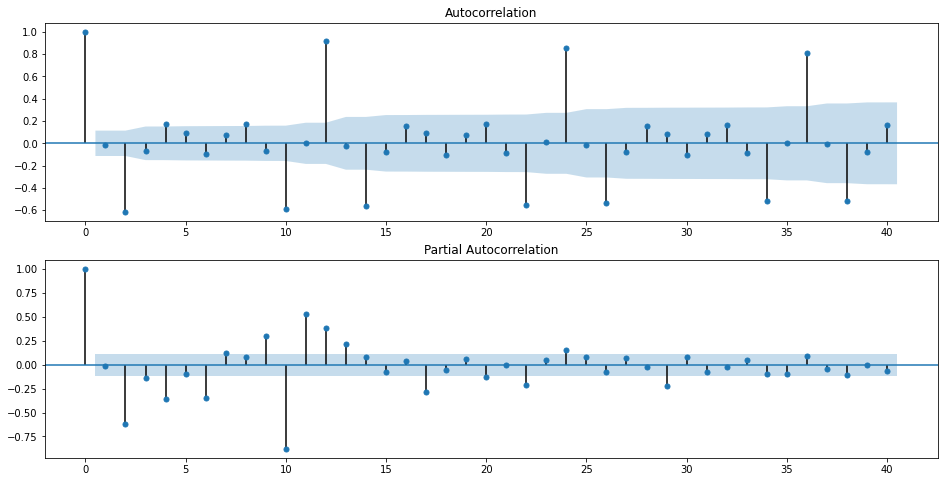

In [25]:
fig=plt.figure(figsize=(16,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [0]:

#if there are non-seasonal terms:
#p=1, q=1or 0 and d1

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
model=ARIMA(df['RSAFSNA'], order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.RSAFSNA   No. Observations:                  308
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3538.641
Method:                       css-mle   S.D. of innovations          23566.072
Date:                Mon, 20 Apr 2020   AIC                           7085.282
Time:                        05:28:16   BIC                           7100.202
Sample:                    02-01-1992   HQIC                          7091.248
                         - 09-01-2017                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1039.4819    153.731      6.762      0.000     738.175    1340.789
ar.L1.D.RSAFSNA    -0.0457      0.062     -0.742      0.459      -0.166       0.075
ma.L1.D.RSAFSNA    -0.8833      0.025    -35.292      0.000      -0.932      -0.834
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -21.8811           +0.0000j           21.8811            0.5000
MA.1            1.1321           +0.0000j            1.1321            0.0000
-----------------------------------------------------------------------------
"""

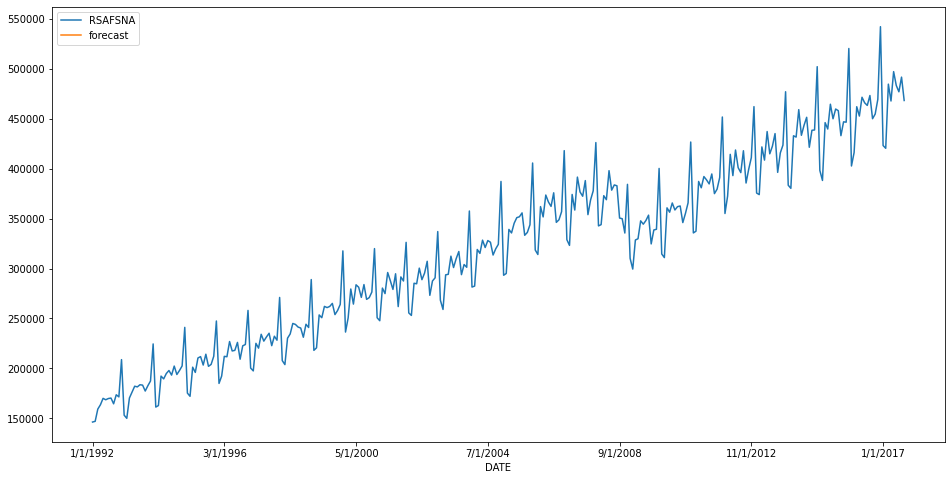

In [30]:
df['forecast']=model_fit.predict(start=87, end=100, dynamic=True)
df[['RSAFSNA', 'forecast']].plot(figsize=(16,8))

In [0]:
import statsmodels.api as sm

In [37]:
model=sm.tsa.statespace.SARIMAX(df['RSAFSNA'], order=(1,1,1), seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [39]:
len(df)

309

In [0]:
from pandas.tseries.offsets import  DateOffset
fcast=model_fit.predict(start=309, end=399, dynamic=True)

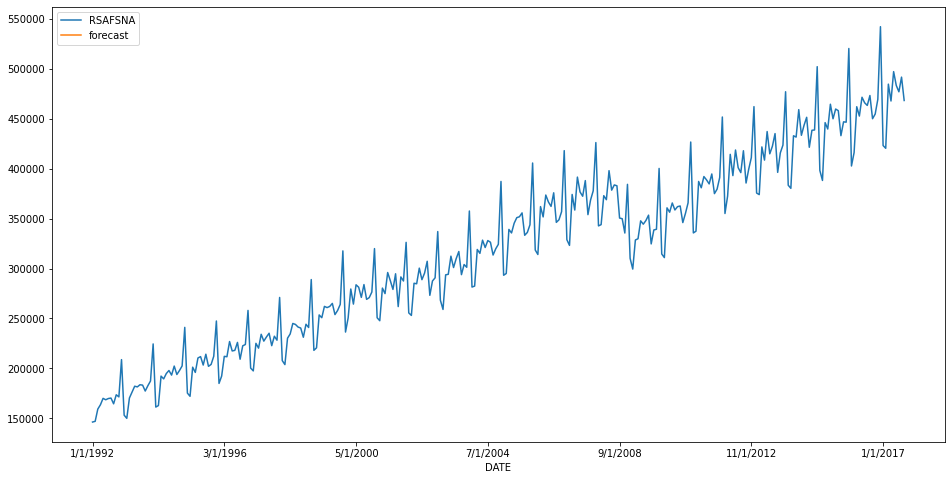

In [45]:

df[['RSAFSNA', 'forecast']].plot(figsize=(16,8))

In [0]:
#forecasting for next 3 months
from pandas.tseries.offsets import DateOffset
future_dates=['df.index[-1] + DateOffset(months=x) for x in range(0,3)']

In [0]:
future_dates_df=pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [71]:
future_dates_df.tail(5)

,RSAFSNA,RSAFSNA First Difference,Seasonal First Difference,forecast


In [0]:
future_df=pd.concat([df, future_dates_df])

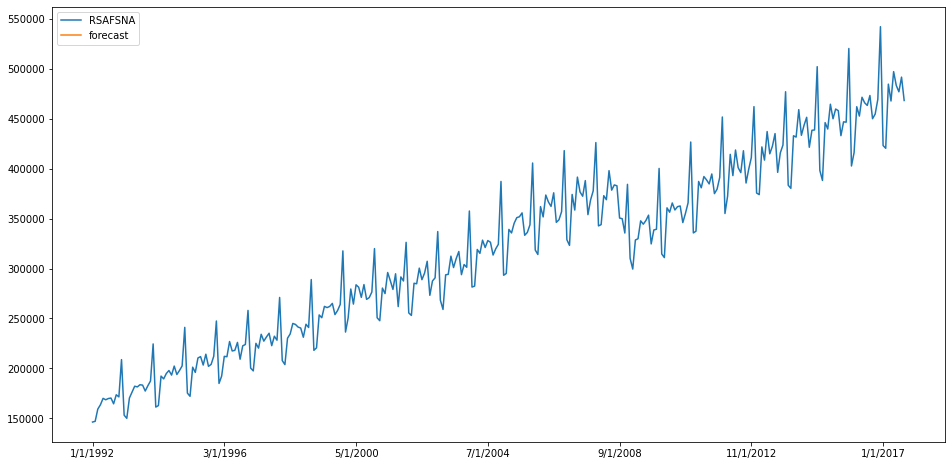

In [73]:
future_df['forecast']=results.predict(start=309, end= 399, dynamic=True)
future_df[['RSAFSNA', 'forecast']].plot(figsize=(16,8))

In [75]:
future_df.head(10)

,RSAFSNA,RSAFSNA First Difference,Seasonal First Difference,forecast
1/1/1992,146376,NaN,NaN,NaN
2/1/1992,147079,703.0,NaN,NaN
3/1/1992,159336,12257.0,12960.0,NaN
4/1/1992,163669,4333.0,16590.0,NaN
5/1/1992,170068,6399.0,10732.0,NaN
6/1/1992,168663,-1405.0,4994.0,NaN
7/1/1992,169890,1227.0,-178.0,NaN
8/1/1992,170364,474.0,1701.0,NaN
9/1/1992,164617,-5747.0,-5273.0,NaN
10/1/1992,173655,9038.0,3291.0,NaN


In [0]:
#------------------------------------------------------------------------------------------------------------THE END------------------------------------------------------------------------------------------------------------------